In [17]:
import numpy as np

def brownian(x, N, dt, delta, N_brownians) -> np.ndarray:
    """
    Simulates Brownian motion using the Euler-Maruyama method.
    
    Args:
    x: Initial position of the Brownian motion.
    N: Number of steps in the simulation.
    dt: Time step between steps.
    delta: Standard deviation of the increment per step.
    N_brownians: number of Brownians to generate.
    
    Returns:
    An array containing the simulated Brownian motion trajectory.
    """

    # Allocate memory for the output array
    out = np.zeros((N_brownians, N))
    out[:, 0] = x
    
    # Generate random increments for all Brownian motions at once
    increments = np.random.normal(0, delta * sqrt(dt), (N_brownians, N))
    
    # Update the positions using the Euler-Maruyama method
    for i in range(1, N):
        out[:, i] = out[:, i - 1] + increments[:, i - 1]
    
    return out

In [18]:
import matplotlib.pyplot as plt

import numpy as np
from math import sqrt

from sklearn.decomposition import PCA

plt.style.use("dark_background")

N = 50000
N_brownians_rows = 40
N_brownians_cols = 40
N_brownians = N_brownians_rows * N_brownians_cols
dt = 0.01
delta = 2
T = N * dt

x0 = 0
X = brownian(x=x0, N=N, dt=dt, delta=delta, N_brownians=N_brownians)
print(f"Obtained brownians with shape: {X.shape}")

Obtained brownians with shape: (1600, 50000)


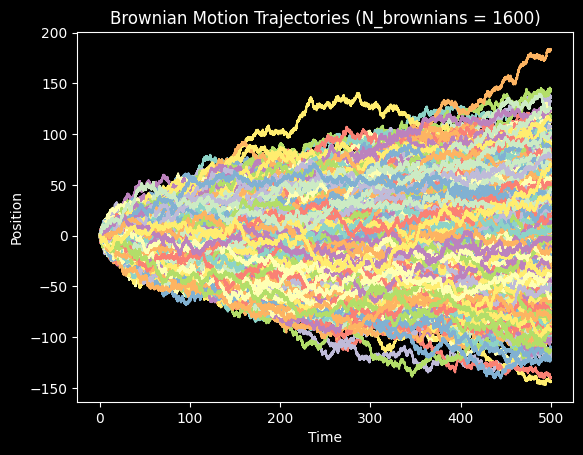

In [19]:
# Plot the Brownian motion trajectories (all at once)

t = np.linspace(0.0, T, N)

import matplotlib.pyplot as plt

for i in range(N_brownians):
  plt.plot(t, X[i, :])

plt.xlabel("Time")
plt.ylabel("Position")
plt.title(f"Brownian Motion Trajectories (N_brownians = {N_brownians})")
plt.show()

In [20]:
n_components_rows: int = 4
n_components_cols: int = 4
n_components: int = n_components_rows * n_components_cols
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)
print(f"Obtained PCs with shape: {principal_components.shape}")

Obtained PCs with shape: (1600, 16)


In [21]:
# We're interested in principal axes (our new basis after PCA is applied)
# So we have 16 principal components in N-dimensional feature space
pca.components_.shape

(16, 50000)

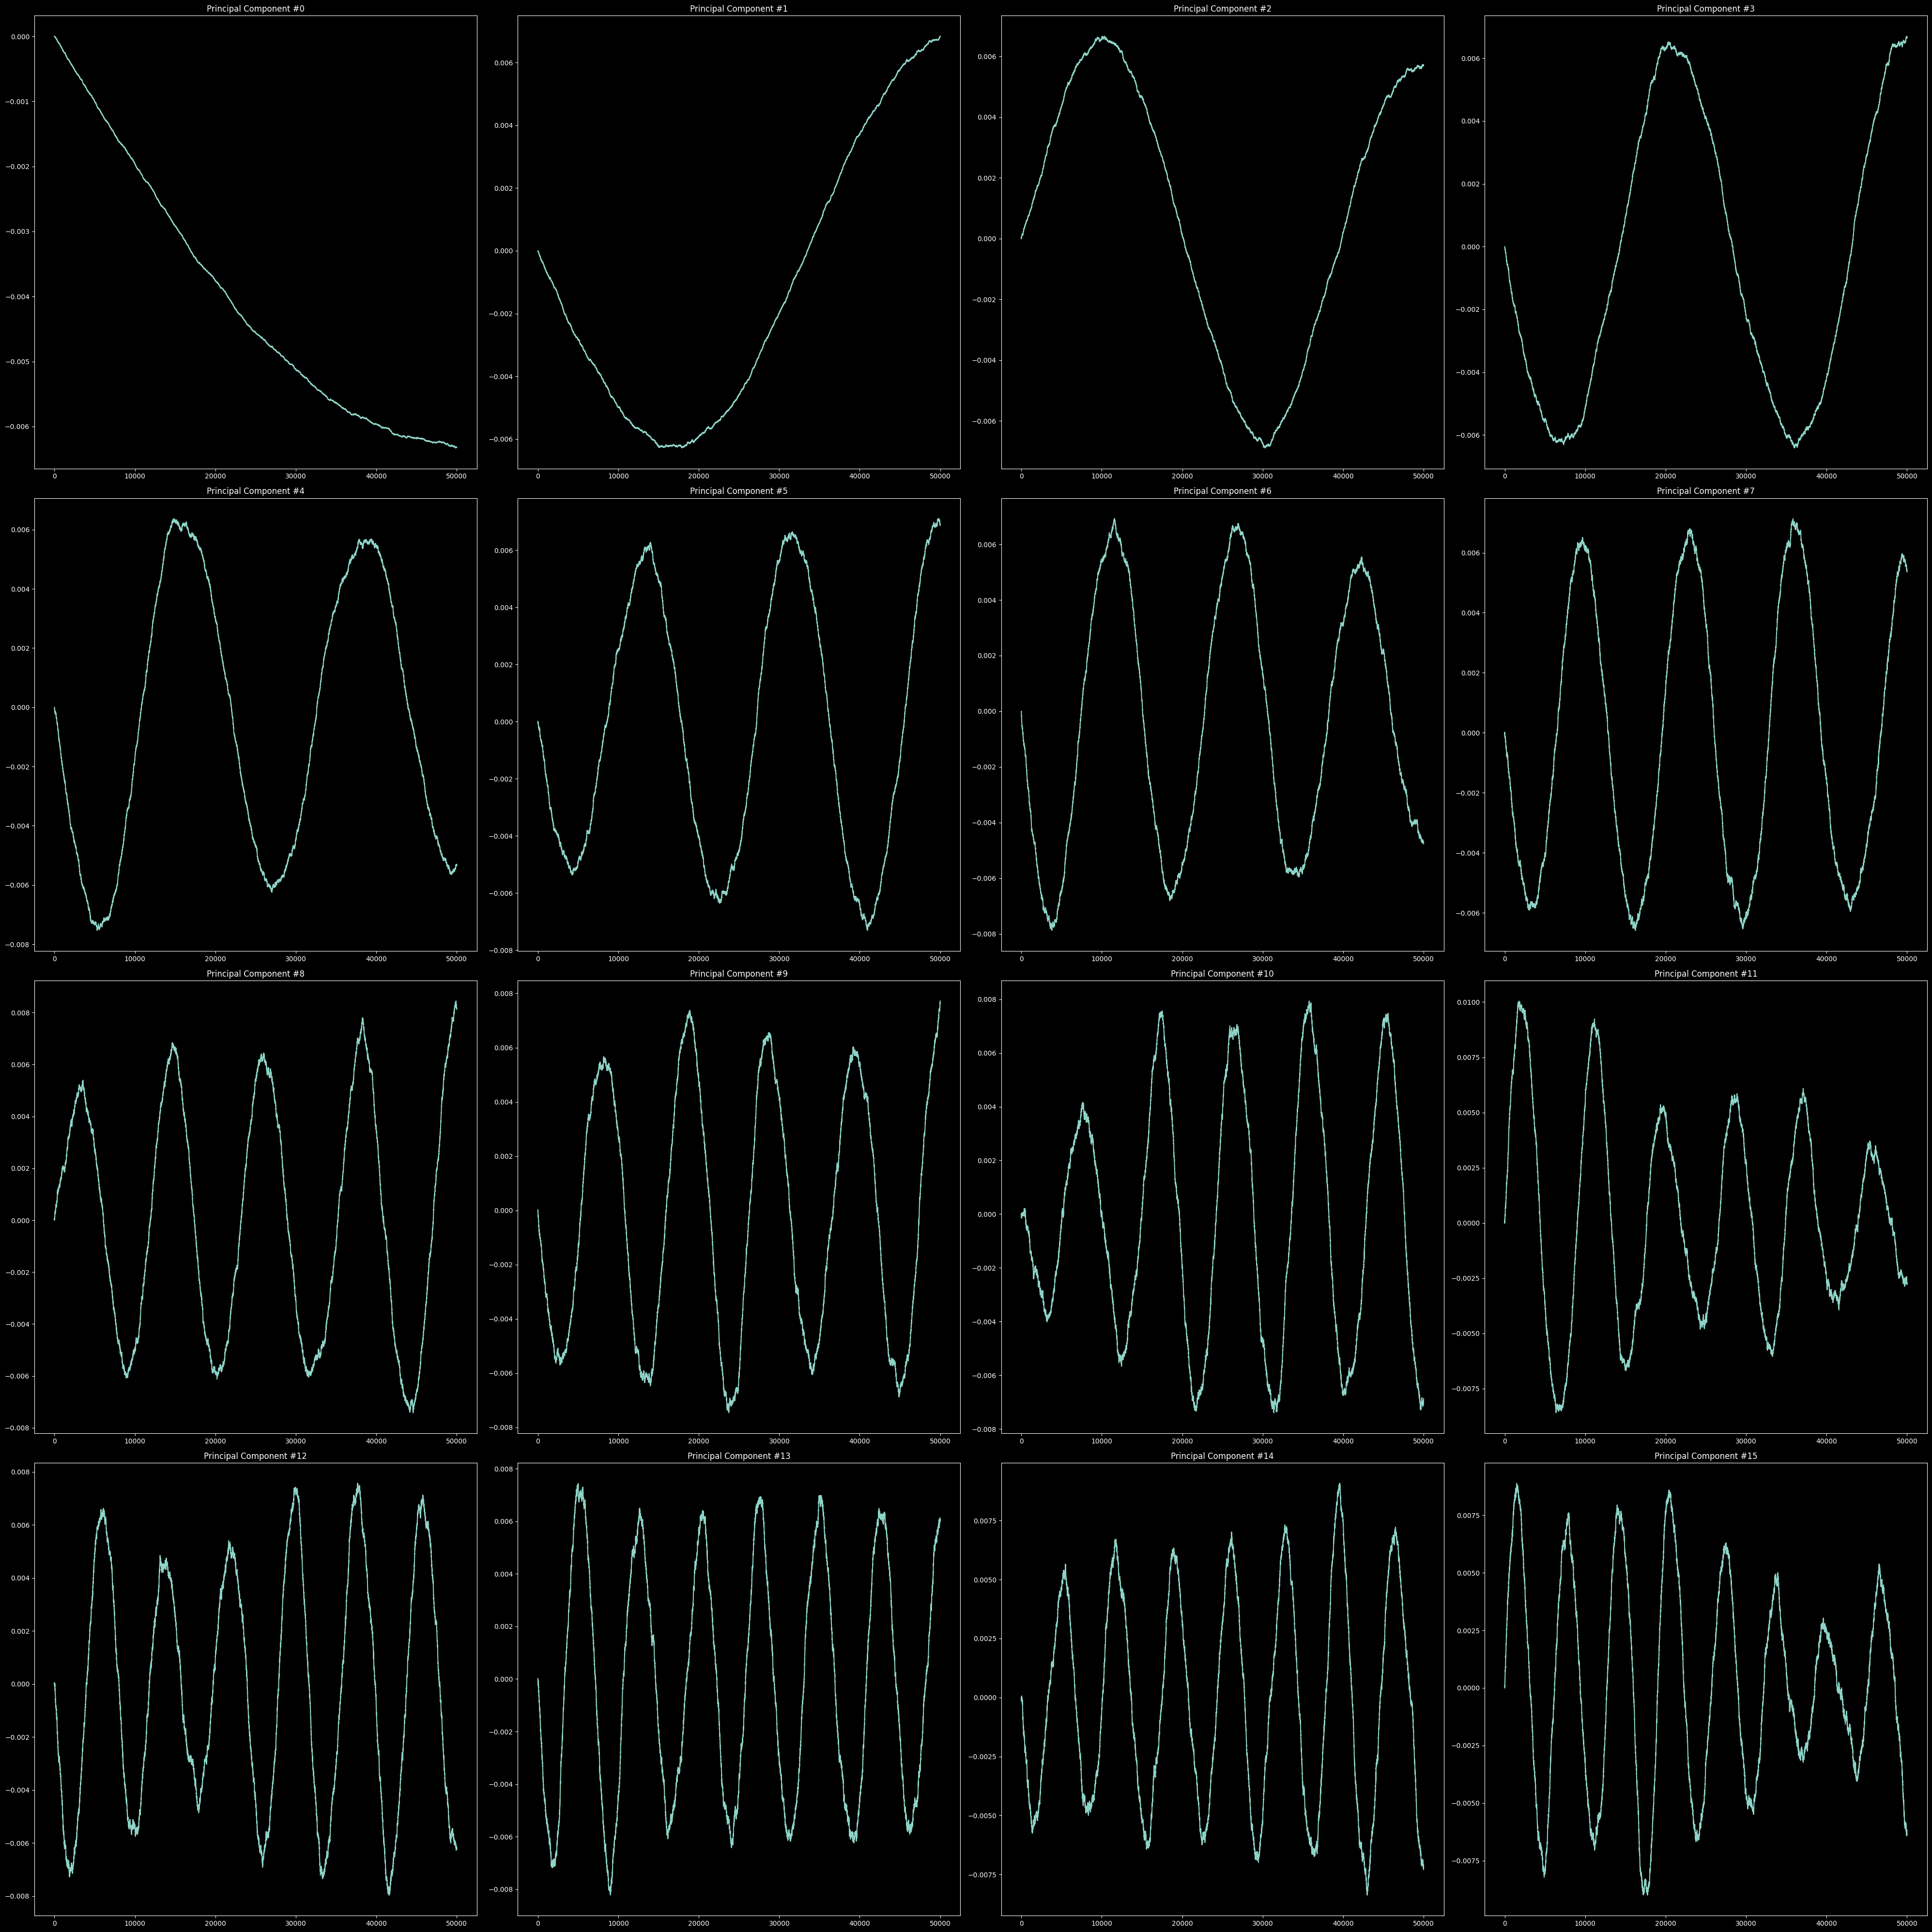

In [23]:
fig, axs = plt.subplots(n_components_rows, n_components_cols, figsize=(40, 40))

for i in range(n_components):
    row = i // n_components_rows
    col = i % n_components_cols

    axs[row, col].plot(pca.components_[i])
    axs[row, col].set_title(f"Principal Component #{i}")

plt.tight_layout()
plt.show()